## Functions used during training

In [1]:
def test_acc(model, test_loader):
    model.eval()
    # model.train()
    with torch.no_grad():
        correct, total = 0, 0
        for labels, img, text, text_mask in test_loader:
            img, labels, text, text_mask = img.to(device), labels.to(device), text.to(device), text_mask.to(device)
            outputs = model(img, text, text_mask)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print(f"Accuracy of the model on the {total} " +
              f"test images: {correct / total:%}")
        return correct / total

In [2]:
def get_y_pred(model, loader):
    model.eval()
    # model.train()
    real = []
    pred = []
    with torch.no_grad():
        correct, total = 0, 0
        for labels, img, text, text_mask in loader:
            img, labels, text, text_mask = img.to(device), labels.to(device), text.to(device), text_mask.to(device)
            outputs = model(img, text, text_mask)
            pred.extend((outputs.data.max(1, keepdim=True)[1]).tolist())
            real.extend(labels.tolist())
    return real, pred

In [3]:
def de_normalize(images):
  t = transforms.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.255],
                           std=[1/0.229, 1/0.224, 1/0.255])
  
  return t(images)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Credit: https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
def make_confusion_matrix(cf, group_names=None, categories='auto', count=False, percent=False, cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None, cmap='Blues', title=None):
    
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

## Loading the weights of the trained model optimizing CNN

### Loading a model

In [5]:
path_model = r"/home/xnmaster/Project/dlnn-project_ia-group_15-1/best_model.pkl"

In [6]:
import pickle

with open(path_model, 'rb') as f:
    data_model = pickle.load(f)
state_dict = data_model['model_weights']
config = data_model['parameters']

In [7]:
from models.models import *
from utils.utils import *

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model, train_loader, test_loader, val_loader = make(config)
model.load_state_dict(state_dict)
model.eval()

Creating anotations...


115it [00:00, 571.21it/s]

Processed 0 images out of 24255


3090it [00:05, 576.90it/s]

Processed 3000 images out of 24255


6067it [00:10, 587.81it/s]

Processed 6000 images out of 24255


9100it [00:15, 586.68it/s]

Processed 9000 images out of 24255


12094it [00:20, 589.06it/s]

Processed 12000 images out of 24255


15081it [00:25, 587.13it/s]

Processed 15000 images out of 24255


18076it [00:30, 579.27it/s]

Processed 18000 images out of 24255


21082it [00:36, 576.94it/s]

Processed 21000 images out of 24255


24100it [00:41, 584.64it/s]

Processed 24000 images out of 24255


24255it [00:41, 583.16it/s]


Transformer(
  (feature_extractor): Sequential(
    (0): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
        (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
      )
      (1): Sequential(
        (0): CNBlock(
          (block): Sequential(
            (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
            (1): Permute()
            (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
            (3): Linear(in_features=96, out_features=384, bias=True)
            (4): GELU(approximate='none')
            (5): Linear(in_features=384, out_features=96, bias=True)
            (6): Permute()
          )
          (stochastic_depth): StochasticDepth(p=0.0, mode=row)
        )
        (1): CNBlock(
          (block): Sequential(
            (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
            (1): Permute()
            (2): LayerNorm(

### Visualizing the data

In [19]:
label2class = {1: "Bakery",
10:"Dry Cleaner",
11:"Funeral",
12:"Hotspot",
13:"MassageCenter",
14:"MedicalCenter",
15:"PackingStore",
16:"Pawnshop",
17:"PetShop",
18:"Pharmacy",
19:"Pizzeria",
2:"Barber",
20:"RepairShop",
21:"Restaurant",
22:"School",
23:"SteakHouse",
24:"Tavern",
25:"TeaHouse",
26:"Theatre",
27:"Tobacco",
28:"Motel",
3:"Bistro",
4:"Bookstore",
5:"Cafe",
6:"ComputerStore",
7:"CountryStore",
8:"Diner",
9:"DiscounHouse"}

In [20]:
labels_per_loader = {}
for name, loader in zip(["train", "test", "val"], [train_loader, test_loader, val_loader]):
    labels_per_loader[name] = []
    for labels, img, text, text_mask in loader:
        labels_per_loader[name].extend(labels.tolist())

In [21]:
list_labels = [element for loader in labels_per_loader.values() for element in loader]

In [22]:
elements, counts = np.unique(list_labels, return_counts=True)
labels_count = dict(zip(elements, counts))
labels_count = {label2class[key+1]: value for key, value in labels_count.items()}

In [23]:
from collections import Counter

plt.figure(figsize=(15, 5))
plt.bar(range(len(labels_count)), [v for k,v in labels_count.items()], color = "steelblue", label = "test")
plt.xticks(range(len(labels_count)), [k for k,v in labels_count.items()],rotation=90)

for i, v in enumerate([v for k,v in labels_count.items()]):
    if v > 999:
        plt.text(i-.53, v + 10, str(v), color='black', fontweight='bold')
    elif v > 99: 
        plt.text(i-.35, v + 10, str(v), color='black', fontweight='bold')
    else:
        plt.text(i-.25, v + 10, str(v), color='black', fontweight='bold')

plt.xlabel('Class')
plt.ylabel('Instances in dataset')
plt.title('Instances per class')
plt.show()

In [24]:
class_less_represented = min(labels_count, key=labels_count.get)
print("The class less represented is: ", class_less_represented, "with", labels_count[class_less_represented], "images")

The class less represented is:  DiscounHouse with 43 images


In [25]:
elements, counts = np.unique(labels_per_loader["train"], return_counts=True)
labels_count_train = dict(zip(elements, counts))
labels_count_train = {label2class[key+1]: value for key, value in labels_count_train.items()}

elements, counts = np.unique(labels_per_loader["val"], return_counts=True)
labels_count_val = dict(zip(elements, counts))
labels_count_val = {label2class[key+1]: value for key, value in labels_count_val.items()}

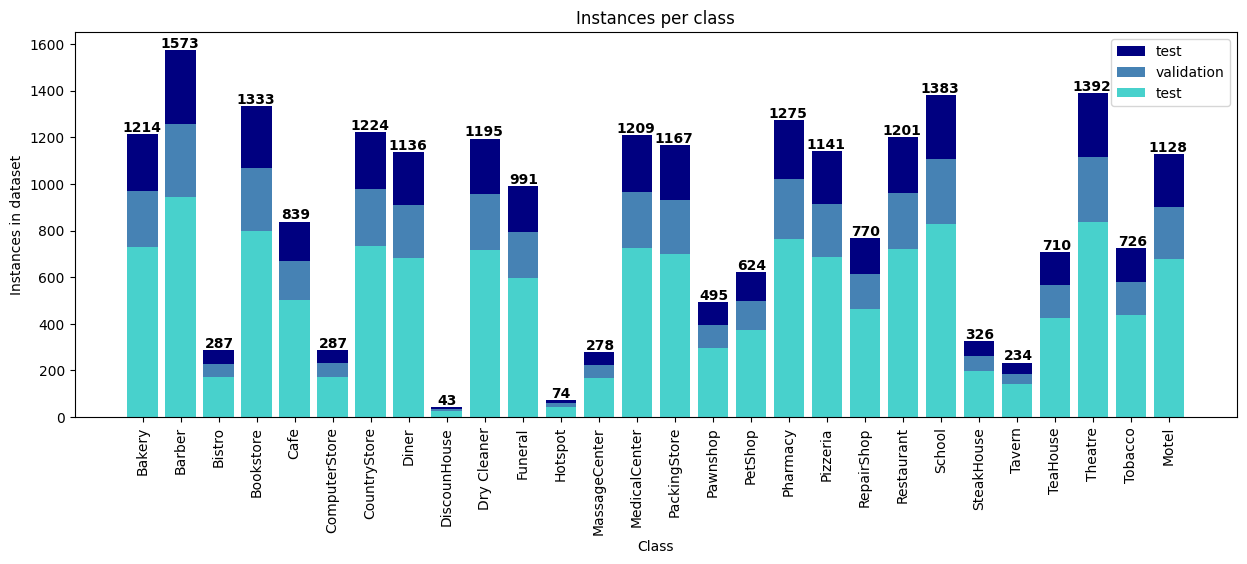

In [26]:
plt.figure(figsize=(15, 5))
plt.bar(range(len(labels_count)), [v for k,v in labels_count.items()], color = "navy", label = "test")
plt.xticks(range(len(labels_count)), [k for k,v in labels_count.items()],rotation=90)

for i, v in enumerate([v for k,v in labels_count.items()]):
    if v > 999:
        plt.text(i-.53, v + 10, str(v), color='black', fontweight='bold')
    elif v > 99: 
        plt.text(i-.35, v + 10, str(v), color='black', fontweight='bold')
    else:
        plt.text(i-.25, v + 10, str(v), color='black', fontweight='bold')

plt.bar(range(len(labels_count)), [v+labels_count_train[k] for k,v in labels_count_val.items()], color = "steelblue", label = "validation")
plt.bar(range(len(labels_count)), [v for k,v in labels_count_train.items()], color = "mediumturquoise", label = "test")

plt.xlabel('Class')
plt.ylabel('Instances in dataset')
plt.title('Instances per class')
plt.legend()
plt.show()

Showing images of this less represented class

In [27]:
class2label = {v:k for k,v in label2class.items()}

In [111]:
import random
class_to_show = class_less_represented
num_imgs_to_show = 5

# selecting 5 random images of the less represented class
all_possible_images = [element for element in test_loader.dataset if element[0] == class2label[class_to_show]]
imgs2show = random.sample(all_possible_images, k = num_imgs_to_show)

fig, ax = plt.subplots(4, 5, figsize=(12, 4))
fig.suptitle("Example images of the class: " + class_to_show)

import random 
for i, idx in enumerate(imgs2show):
    plt.subplot(1, 5, i + 1)

    label, img, txt, txt_mask = idx
    img = img.reshape(3, 224, 224)
    img = de_normalize(img)
    img = img.permute(1, 2, 0).numpy() 
    img -= img.min()
    img = (img / img.max()) * 255
    plt.imshow(img.astype('uint8'))
    plt.axis('off')

plt.tight_layout()
plt.show()
    

/tmp/ipykernel_43560/1451461535.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 5, i + 1)


Showing an image of each of the classes

In [33]:
# Looking at the indices of the images of each class in the test set
all_possible_images = {k: [] for k in range(28)}
prev = 0
for labels, img, text, text_mask in test_loader:
    for i, label in enumerate(labels.tolist()):
        all_possible_images[label].append(prev + i)
    prev += len(labels.tolist())

In [34]:
plt.figure(figsize=(14, 10))
import random 
for label, idxs in all_possible_images.items():
    plt.subplot(5, 6, label + 1)
    # Get a random image from each class
    idx = random.choice(idxs)
    label, img, txt, txt_mask = test_loader.dataset[idx]
    
    img = img.reshape(3, 224, 224)
    img = de_normalize(img)
    img = img.permute(1, 2, 0).numpy() 
    img -= img.min()
    img = (img / img.max()) * 255
    
    plt.title(str(label2class[label+1]), color="black")
    plt.imshow(img.astype('uint8'))
    
    # Raise the separation between the images
    plt.subplots_adjust(top=1.1)
    plt.axis('off')
plt.show()

### Evaluating the model

In [35]:
test_accuracy = test_acc(model, test_loader)

/anaconda/lib/python3.10/site-packages/torch/nn/modules/transformer.py:296: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at ../aten/src/ATen/NestedTensorImpl.cpp:177.)
  output = torch._nested_tensor_from_mask(output, src_key_padding_mask.logical_not(), mask_check=False)


Accuracy of the model on the 4851 test images: 83.858998%


In [36]:
y_test, y_pred = get_y_pred(model, test_loader)

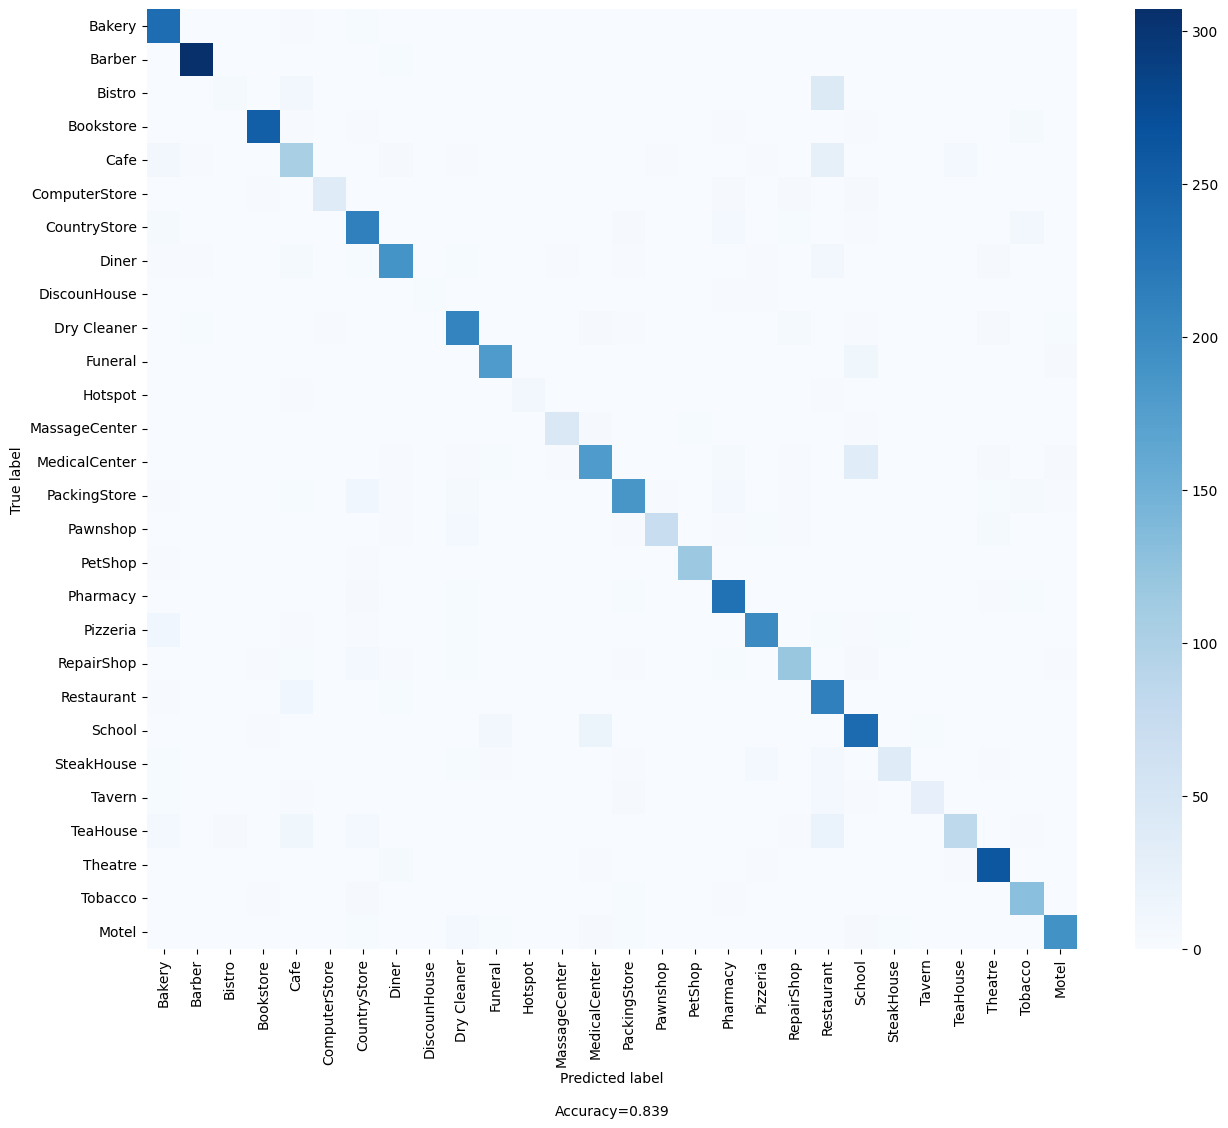

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
import seaborn as sns
categories = [label2class[i] for i in range(1, 29)]
cm = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cm, cmap='Blues', categories=categories, figsize=(15, 12.2))
plt.show()

Computing the recall of each class in the test data

In [39]:
dict_recalls = {}
for i in range(cm.shape[0]):
    row = cm[i, :]
    well_predicted = cm[i, i]
    if sum(row) != 0:
        recall = well_predicted/sum(row)
        dict_recalls[label2class[i+1]] = recall
    else:
        dict_recalls[label2class[i+1]] = 0

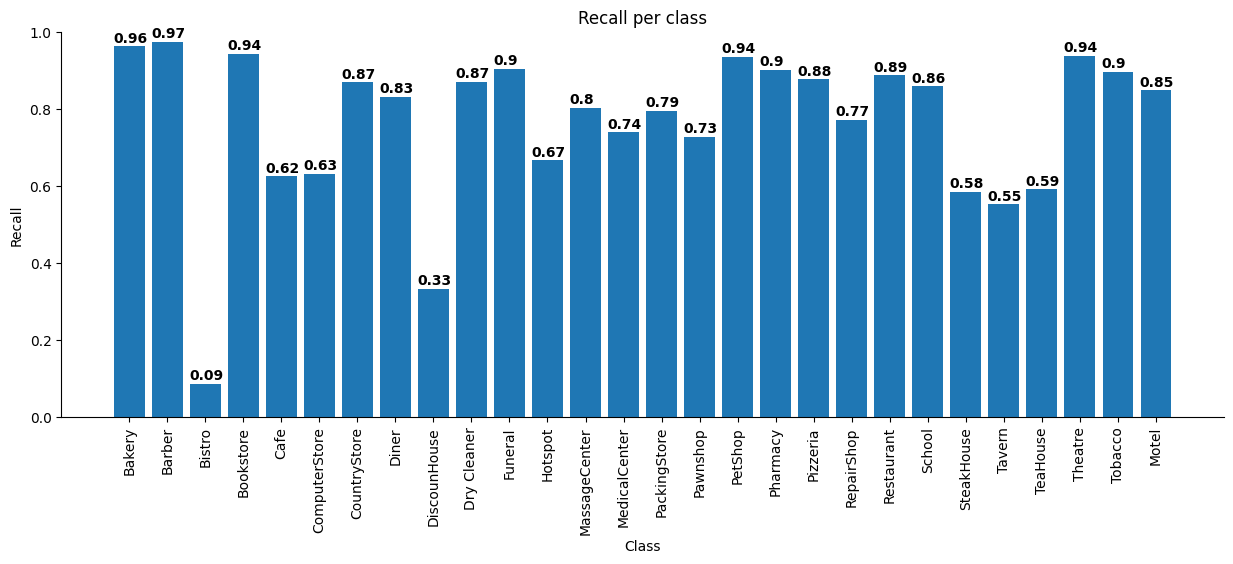

In [108]:
plt.figure(figsize=(15, 5))
plt.bar(range(len(dict_recalls)), [v for k,v in dict_recalls.items()])
plt.xticks(range(len(dict_recalls)), [k for k,v in dict_recalls.items()],rotation=90)
for i, v in enumerate([v for k,v in dict_recalls.items()]):
    plt.text(i-.42, v + 0.01, str(round(v, 2)), color='black', fontweight='bold')

plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Recall per class')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.ylim(0, 1)
plt.show()

Computing the precision of each class in the test data

In [41]:
dict_precisions = {}
for i in range(cm.shape[0]):
    column = cm[:, i]
    well_predicted = cm[i, i]
    if sum(column) != 0:
        precision = well_predicted/sum(column)
        dict_precisions[label2class[i+1]] = precision
    else:
        dict_precisions[label2class[i+1]] = 0

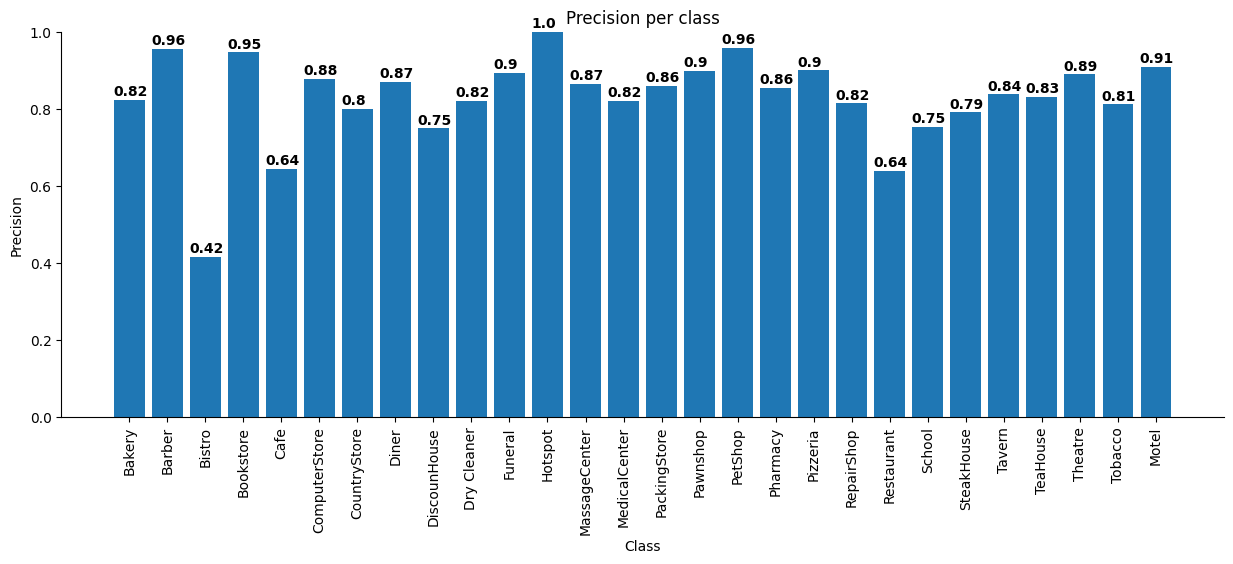

In [109]:
plt.figure(figsize=(15, 5))
plt.bar(range(len(dict_precisions)), [v for k,v in dict_precisions.items()])
plt.xticks(range(len(dict_precisions)), [k for k,v in dict_precisions.items()],rotation=90)
for i, v in enumerate([v for k,v in dict_precisions.items()]):
    plt.text(i-.42, v + 0.01, str(round(v, 2)), color='black', fontweight='bold')

plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision per class')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.ylim(0, 1)
plt.show()

Computing the F1 score for each class in the test data

In [43]:
dict_f1_scores = {}
for k in dict_precisions.keys():
    if (dict_precisions[k]+dict_recalls[k]) != 0:
        dict_f1_scores[k] = (2*dict_precisions[k]*dict_recalls[k])/(dict_precisions[k]+dict_recalls[k])
    else:
        dict_f1_scores[k] = 0

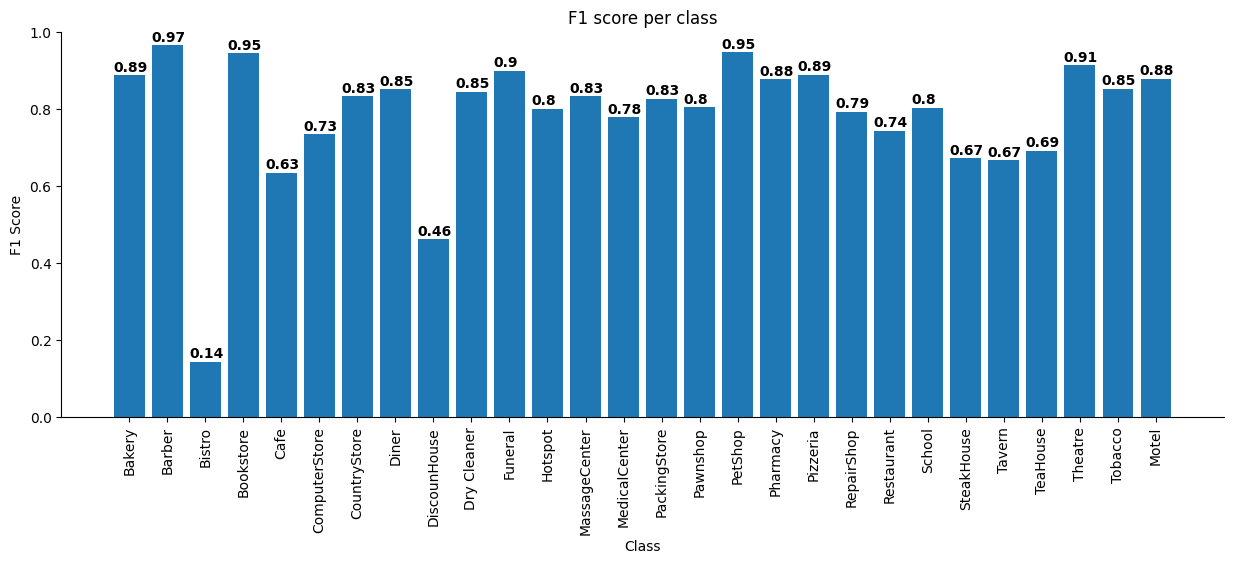

In [110]:
plt.figure(figsize=(15, 5))
plt.bar(range(len(dict_f1_scores)), [v for k,v in dict_f1_scores.items()])
plt.xticks(range(len(dict_f1_scores)), [k for k,v in dict_f1_scores.items()],rotation=90)
for i, v in enumerate([v for k,v in dict_f1_scores.items()]):
    plt.text(i-.42, v + 0.01, str(round(v, 2)), color='black', fontweight='bold')
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('F1 score per class')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.ylim(0, 1)
plt.show()

In [45]:
print("Mean precision:", np.mean([v for v in dict_precisions.values()]))
print("Mean recall:", np.mean([v for v in dict_recalls.values()]))
print("Mean F1 score:", np.mean([v for v in dict_f1_scores.values()]))

Mean precision: 0.8304331083841584
Mean recall: 0.7647638905954862
Mean F1 score: 0.7848154683136226


Comparing the F1 score with the amount of instances of each class

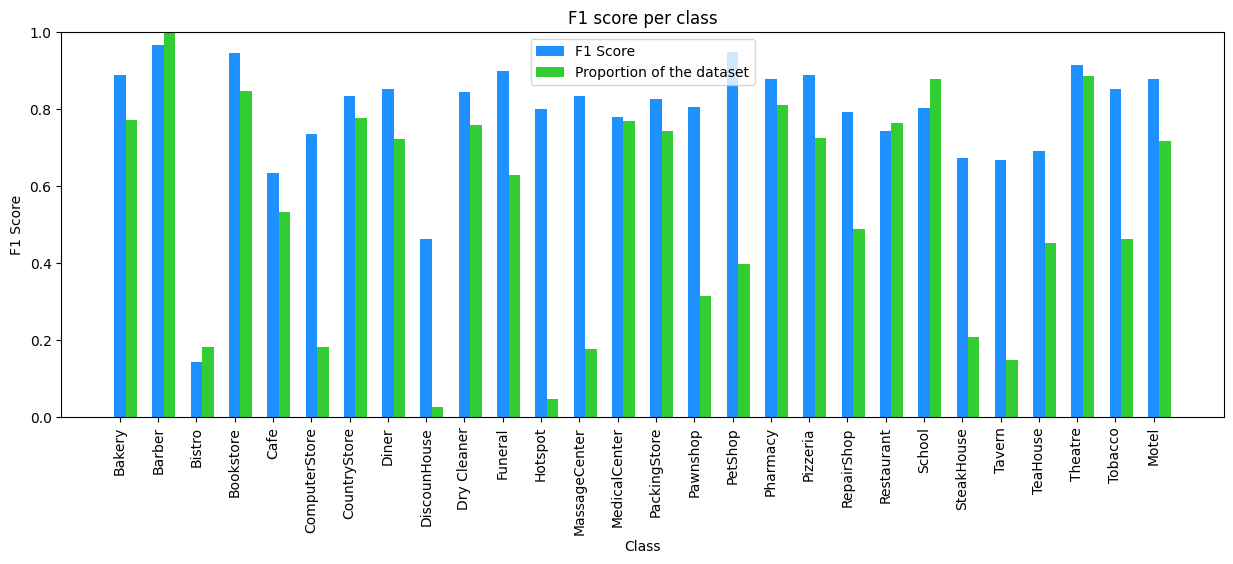

In [46]:
plt.figure(figsize=(15, 5))
width = 0.3
plt.bar(range(len(dict_f1_scores)), [v for k,v in dict_f1_scores.items()], width = width, label='F1 Score', color = "dodgerblue")
plt.bar(np.arange(len(dict_precisions))+ width, np.array([v for k,v in labels_count.items()])/max(labels_count.values()), width = width, label='Proportion of the dataset', color = "limegreen")

plt.xticks(range(len(dict_f1_scores)), [k for k,v in dict_f1_scores.items()],rotation=90)
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('F1 score per class')
plt.ylim(0, 1)
plt.legend()
plt.show()

In the previous plot we can see that the F1 score for each class(blue) and the number of images of each class normalized by the maximum number of instances of a class(green).

This is an interesting plot because we would expect classes with more instances to have a better F1 score, but this is not the case. We can see that there are some classes like "Hotspot" that have very few instances but have a high F1 score. This is because the model is able to learn the patters of the class even with few instances probably because the images are really similar intraclasswise and really different interclasswise. Later in this notebook we will visualize some of this images. 

Showing some predictions of the model

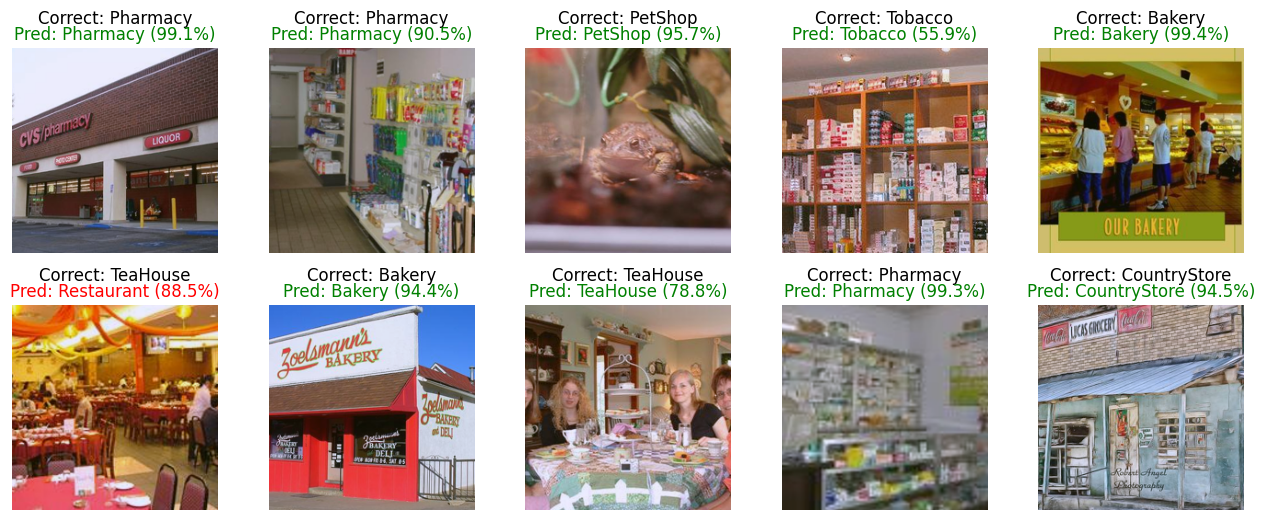

In [48]:
lenght_dataset = len(test_loader.dataset)
plt.figure(figsize=(16, 6))
plt.subplots_adjust(hspace=0.25)
for i in range(10):
    plt.subplot(2, 5, i + 1) 

    idx = np.random.randint(0, lenght_dataset)
    label, img, txt, txt_mask = test_loader.dataset[idx]
    img = img.unsqueeze(0)
    txt = torch.tensor(txt).unsqueeze(0)
    txt_mask = torch.tensor(txt_mask).unsqueeze(0)
    with torch.no_grad():
        output = model(img.to(device), txt.to(device), txt_mask.to(device))
        prob, pred = torch.max(torch.nn.functional.softmax(output, dim=1), 1)

    if pred == label:
      color = 'green'
    else:
      color = "red"
      
    prob = prob.to("cpu").numpy()[0]
    prob = round(prob*100, 1)
    plt.title("Pred: "+ str(label2class[int(pred.to("cpu").numpy())+1]) + " (" + str(prob) + "%)", color=color)
    plt.text(0.5, 1.1, "Correct: "+ str(label2class[label+1]), color="black", fontsize=12, ha='center', va='bottom', transform=plt.gca().transAxes)

    img = img.reshape(3, 224, 224)
    img = de_normalize(img)
    img = img.permute(1, 2, 0).numpy() 
    img -= img.min()
    img = (img / img.max()) * 255
    plt.imshow(img.astype('uint8'))
    plt.axis('off')
plt.show()

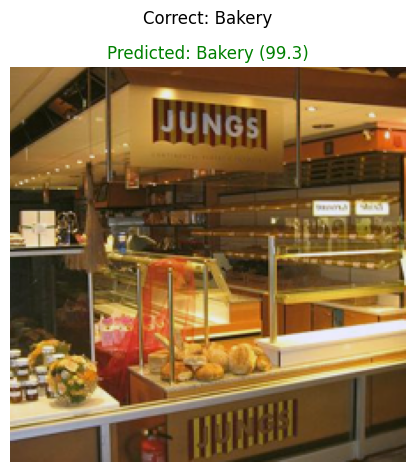

In [90]:
def predict_img(label, img, txt, txt_mask):
    img = img.unsqueeze(0)
    txt = torch.tensor(txt).unsqueeze(0)
    txt_mask = torch.tensor(txt_mask).unsqueeze(0)
    with torch.no_grad():
        output = model(img.to(device), txt.to(device), txt_mask.to(device))
        prob, pred = torch.max(torch.nn.functional.softmax(output, dim=1), 1)

    if pred == label:
        color = 'green'
    else:
        color = "red"

    prob = prob.to("cpu").numpy()[0]
    prob = round(prob*100, 1)

    return prob, pred, color


idx = np.random.randint(0, lenght_dataset)
label, img, txt, txt_mask = test_loader.dataset[idx]
prob, pred, color = predict_img(label, img, txt, txt_mask)

plt.title("Predicted: "+ str(label2class[int(pred.to("cpu").numpy())+1]) + " (" + str(prob) + ")", color=color)
plt.text(0.5, 1.1, "Correct: "+ str(label2class[label+1]), color="black", fontsize=12, ha='center', va='bottom', transform=plt.gca().transAxes)

img = img.reshape(3, 224, 224)
img = de_normalize(img)
img = img.permute(1, 2, 0).numpy() 
img -= img.min()
img = (img / img.max()) * 255
plt.imshow(img.astype('uint8'))
plt.axis('off')
plt.tight_layout()
plt.show()

Looking at the predictions of the class "DiscounHouse"

In [51]:
y_pred_temp = [i[0] for i in y_pred]

In [99]:
# create a plot of false negative from the worse class in terms of recall
def show_false_negatives(class_to_show):
    num_class_to_show = [k for k,v in label2class.items() if v == class_to_show][0] - 1

    index = []
    for i in range(len(y_pred_temp)):
        if y_pred_temp[i] != num_class_to_show and y_test[i] == num_class_to_show:
            index.append(i) 

    num_imgs_to_show = 6
    fig = plt.figure(figsize=(8, 8))
    fig.suptitle("Some false negatives imgs from the class: " + class_to_show)
    import random  
    random.shuffle(index) # So we show diferent images each time
    for i, idx in enumerate(index[:num_imgs_to_show]):
        plt.subplot(3, 3, i + 1)

        label, img, txt, txt_mask = test_loader.dataset[idx]
        prob, pred, color = predict_img(label, img, txt, txt_mask)
        img = img.reshape(3, 224, 224)
        img = de_normalize(img)
        img = img.permute(1, 2, 0).numpy() 
        img -= img.min()
        img = (img / img.max()) * 255

        plt.title("Pred: "+ str(label2class[int(pred.to("cpu").numpy())+1]) + " (" + str(prob) + "%)", color=color)
        plt.text(0.5, 1.13, "Correct: "+ str(label2class[label+1]), color="black", fontsize=12, ha='center', va='bottom', transform=plt.gca().transAxes)

        plt.imshow(img.astype('uint8'))
        plt.axis('off')
        plt.tight_layout()
    plt.show()
    

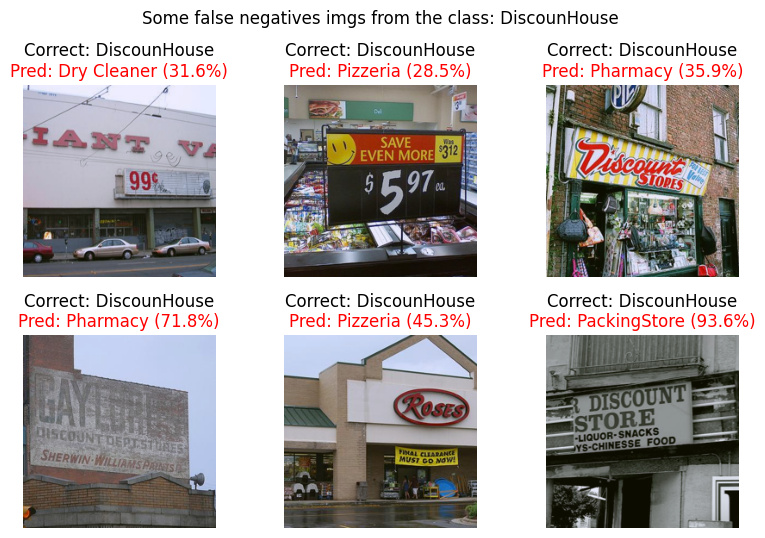

In [102]:
class_to_show = "DiscounHouse"
show_false_negatives(class_to_show)

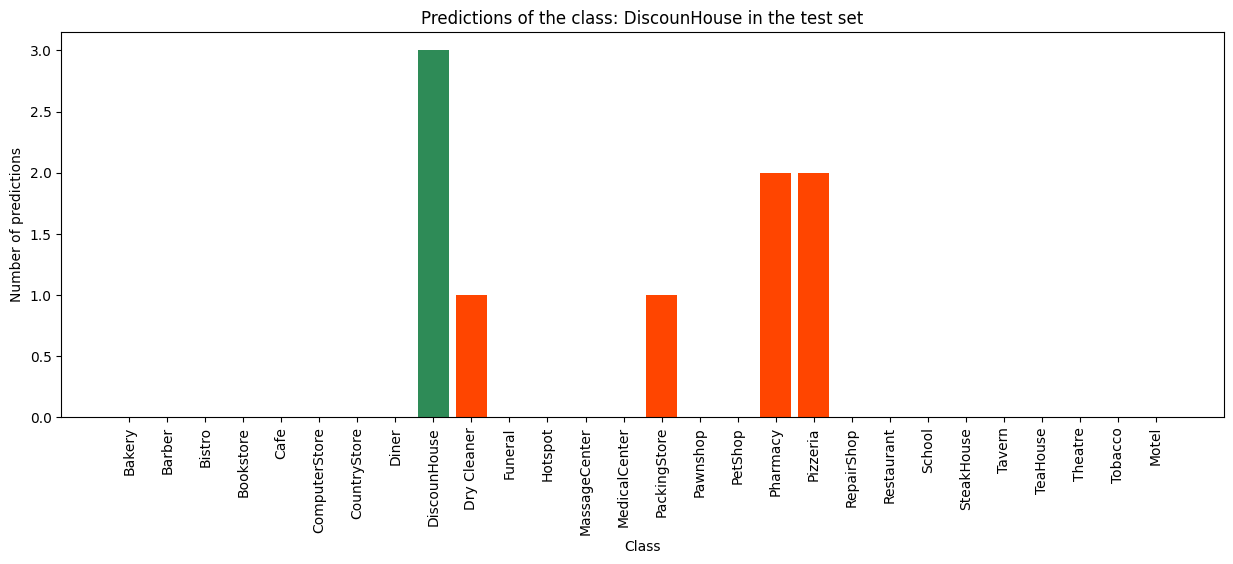

In [103]:
index = []
for i in range(len(y_pred_temp)):
    if y_test[i] == class2label[class_to_show] - 1:
        index.append(i)

y_pred_class = []
for i in index:
    y_pred_class.append(y_pred_temp[i])

#plot a histogram of the predictions of the class
plt.figure(figsize=(15, 5))

plt.bar(range(28), [y_pred_class.count(i) for i in range(28)], color = "orangered")
plt.bar(class2label[class_to_show]-1, 3, color='seagreen')
plt.xticks(range(28), [label2class[i+1] for i in range(28)],rotation=90)
plt.xlabel('Class')
plt.ylabel('Number of predictions')
plt.title('Predictions of the class: ' + class_to_show + ' in the test set')
plt.show()

In this model 6 out of 9 imgs of the test data of class DiscounHouse were predicted wrong. 

But the hotspot class wich also has very low number of instances has a high F1 score, we will look into this images:

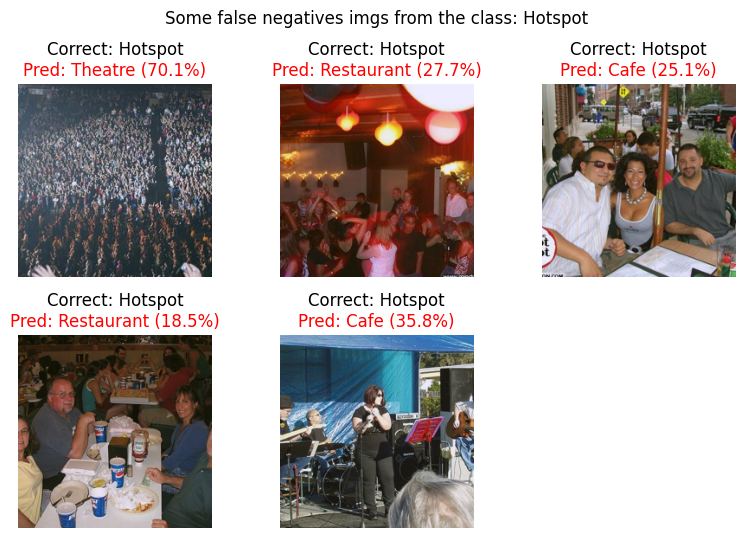

In [104]:
# create a plot of false negative from the worse class in terms of recall
class_to_show = "Hotspot"
show_false_negatives(class_to_show)

In [105]:
# Now some true possitives
class_to_show = "Hotspot"
num_class_to_show = [k for k,v in label2class.items() if v == class_to_show][0] - 1

index = []
for i in range(len(y_pred_temp)):
    if y_pred_temp[i] == num_class_to_show and y_test[i] == num_class_to_show:
        index.append(i) 

num_imgs_to_show = 6
fig = plt.figure(figsize=(8, 8))
fig.suptitle("Some false negatives imgs from the class: " + class_to_show)
import random  
random.shuffle(index) # So we show diferent images each time
for i, idx in enumerate(index[:num_imgs_to_show]):
    plt.subplot(3, 3, i + 1)

    label, img, txt, txt_mask = test_loader.dataset[idx]
    prob, pred, color = predict_img(label, img, txt, txt_mask)
    img = img.reshape(3, 224, 224)
    img = de_normalize(img)
    img = img.permute(1, 2, 0).numpy() 
    img -= img.min()
    img = (img / img.max()) * 255

    plt.title("Pred: "+ str(label2class[int(pred.to("cpu").numpy())+1]) + " (" + str(prob) + "%)", color=color)
    plt.text(0.5, 1.13, "Correct: "+ str(label2class[label+1]), color="black", fontsize=12, ha='center', va='bottom', transform=plt.gca().transAxes)

    plt.imshow(img.astype('uint8'))
    plt.axis('off')
    plt.tight_layout()
plt.show()


A reason way in this class the images are predicted well nevertheless that there are very few in the training instances could be that this class is very diferent to the rest. This class has images of persons and in the rest of cases are mostly of buildings.

## Model with pre-extracted features (Not optimizing CNN)

In [ ]:
# path_model = "/home/xnmaster/Project/model_MobileNet_V3.pt"
path_model = r"C:\Users\Joan\Desktop\Deep_Learning_project\features_extracted_previously.pkl"

In [ ]:
import pickle

with open(path_model, 'rb') as f:
    data_model = pickle.load(f)
state_dict = data_model['Model_weights']
config = data_model['parameters']

In [ ]:
from models.models import *
from utils.utils import *

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model, train_loader, test_loader, val_loader = make_features_test(config)
model.load_state_dict(state_dict)
model.eval()

Transformer_without_extracting_features(
  (cnn_features_embed): Linear(in_features=49, out_features=360, bias=True)
  (text_features_embed): Linear(in_features=300, out_features=360, bias=True)
  (transformer): TransformerEncoder(
    (layers): ModuleList(
      (0-4): 5 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=360, out_features=360, bias=True)
        )
        (linear1): Linear(in_features=360, out_features=340, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=340, out_features=360, bias=True)
        (norm1): LayerNorm((360,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((360,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (fc): Sequential(
    (0): Linear(in_features=360, out_features=340, bias=True)
    (1): GELU(

In [ ]:
test_accuracy = test_acc(model, test_loader)

c:\Users\Joan\anaconda3\lib\site-packages\torch\nn\modules\transformer.py:296: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\NestedTensorImpl.cpp:179.)
  output = torch._nested_tensor_from_mask(output, src_key_padding_mask.logical_not(), mask_check=False)


Accuracy of the model on the 4851 test images: 68.975469%


In [ ]:
y_test, y_pred = get_y_pred(model, test_loader)

In [ ]:
label2class = {1: "Bakery",
10:"Dry Cleaner",
11:"Funeral",
12:"Hotspot",
13:"MassageCenter",
14:"MedicalCenter",
15:"PackingStore",
16:"Pawnshop",
17:"PetShop",
18:"Pharmacy",
19:"Pizzeria",
2:"Barber",
20:"RepairShop",
21:"Restaurant",
22:"School",
23:"SteakHouse",
24:"Tavern",
25:"TeaHouse",
26:"Theatre",
27:"Tobacco",
28:"Motel",
3:"Bistro",
4:"Bookstore",
5:"Cafe",
6:"ComputerStore",
7:"CountryStore",
8:"Diner",
9:"DiscounHouse"}

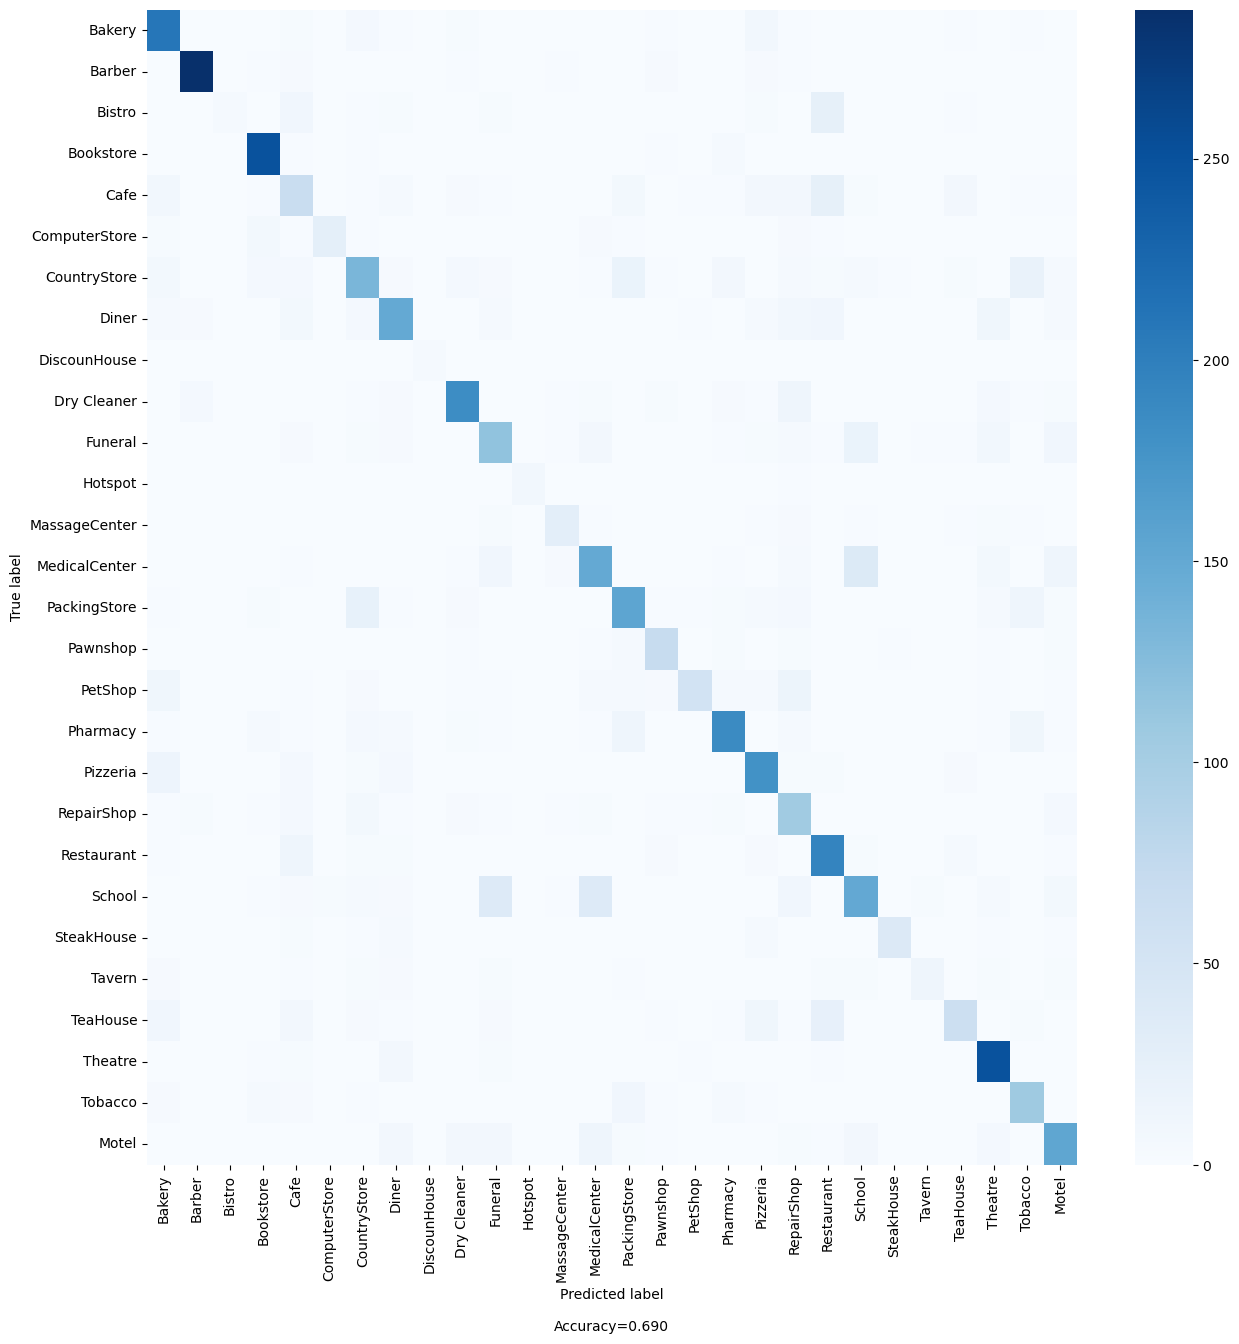

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
import seaborn as sns
categories = [label2class[i] for i in range(1, 29)]
cm = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cm, cmap='Blues', categories=categories, figsize=(15, 15))
plt.show()

In [ ]:
dict_recalls = {}
for i in range(cm.shape[0]):
    row = cm[i, :]
    well_predicted = cm[i, i]
    if sum(row) != 0:
        recall = well_predicted/sum(row)
        dict_recalls[label2class[i+1]] = recall
    else:
        dict_recalls[label2class[i+1]] = 0

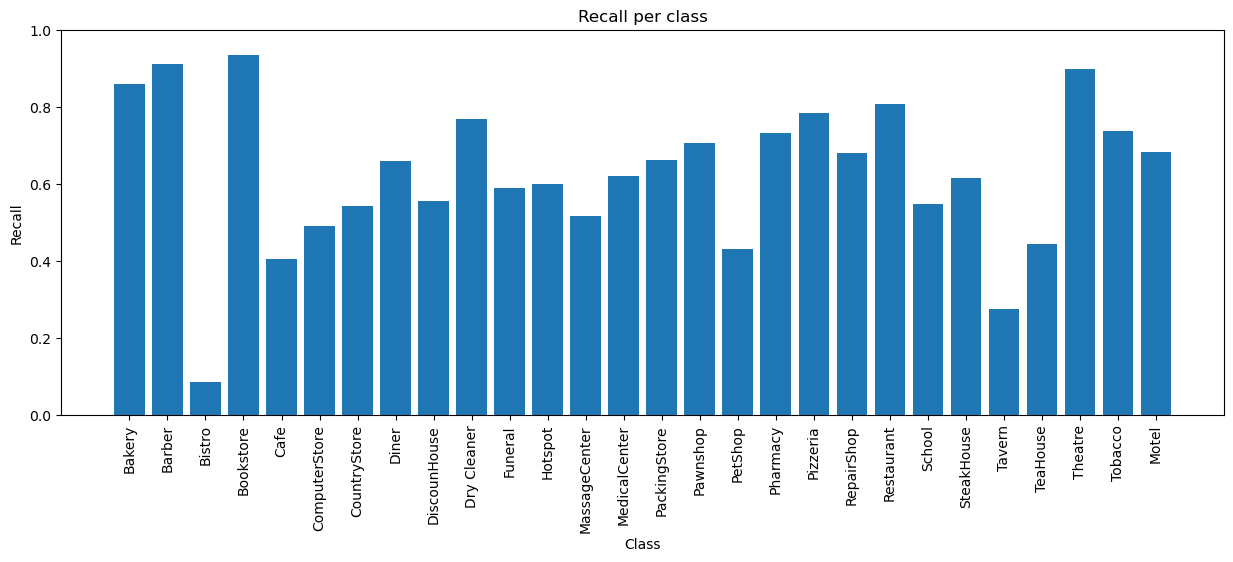

In [ ]:
plt.figure(figsize=(15, 5))
plt.bar(range(len(dict_recalls)), [v for k,v in dict_recalls.items()])
plt.xticks(range(len(dict_recalls)), [k for k,v in dict_recalls.items()],rotation=90)
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Recall per class')
plt.ylim(0, 1)
plt.show()

In [ ]:
dict_precisions = {}
for i in range(cm.shape[0]):
    column = cm[:, i]
    well_predicted = cm[i, i]
    if sum(column) != 0:
        precision = well_predicted/sum(column)
        dict_precisions[label2class[i+1]] = precision
    else:
        dict_precisions[label2class[i+1]] = 0

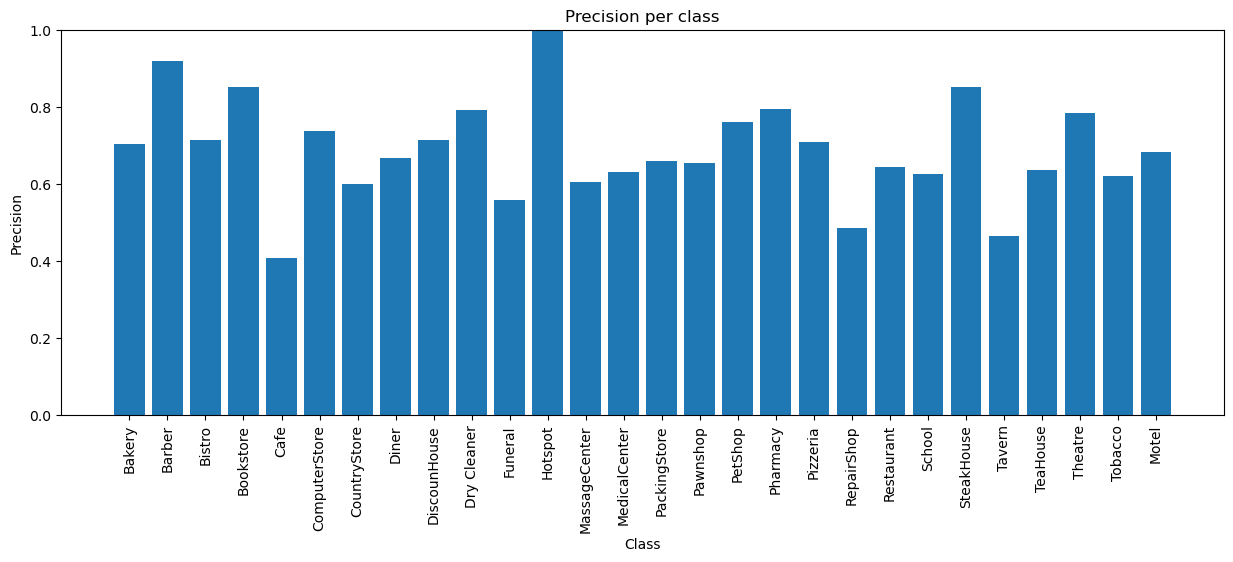

In [ ]:
plt.figure(figsize=(15, 5))
plt.bar(range(len(dict_precisions)), [v for k,v in dict_precisions.items()])
plt.xticks(range(len(dict_precisions)), [k for k,v in dict_precisions.items()],rotation=90)
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision per class')
plt.ylim(0, 1)
plt.show()

In [ ]:
dict_f1_scores = {}
for k in dict_precisions.keys():
    if (dict_precisions[k]+dict_recalls[k]) != 0:
        dict_f1_scores[k] = (2*dict_precisions[k]*dict_recalls[k])/(dict_precisions[k]+dict_recalls[k])
    else:
        dict_f1_scores[k] = 0

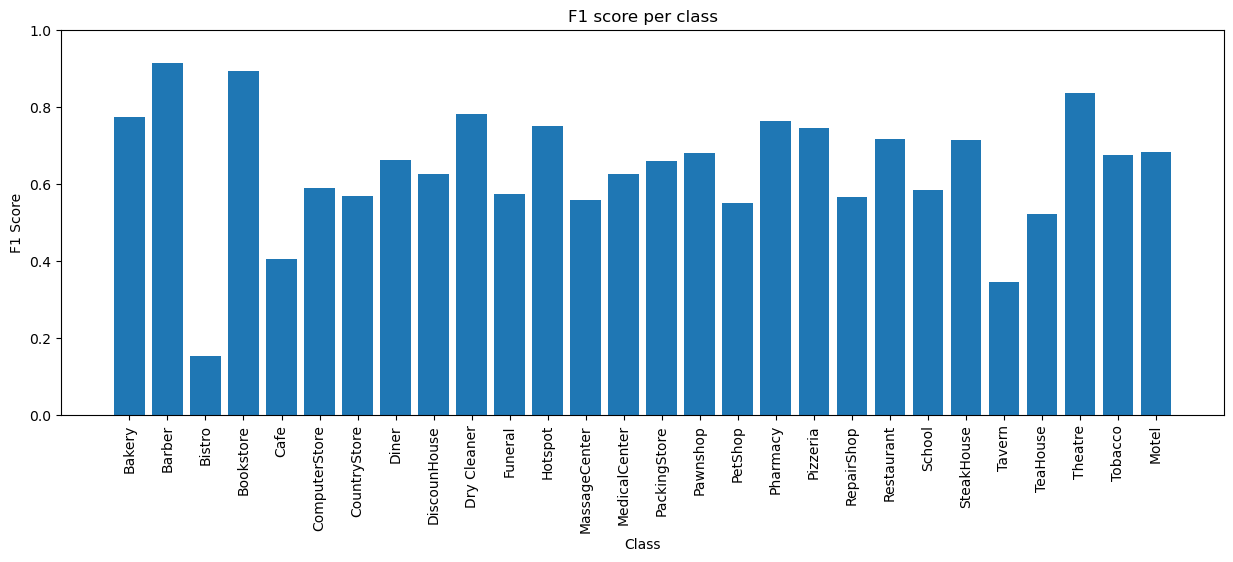

In [ ]:
plt.figure(figsize=(15, 5))
plt.bar(range(len(dict_f1_scores)), [v for k,v in dict_f1_scores.items()])
plt.xticks(range(len(dict_f1_scores)), [k for k,v in dict_f1_scores.items()],rotation=90)
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('F1 score per class')
plt.ylim(0, 1)
plt.show()

In [ ]:
print("Mean precision:", np.mean([v for v in dict_precisions.values()]))
print("Mean recall:", np.mean([v for v in dict_recalls.values()]))
print("Mean F1 score:", np.mean([v for v in dict_f1_scores.values()]))

Mean precision: 0.6886268459290221
Mean recall: 0.6271999234653007
Mean F1 score: 0.6403211357293958
